# El método de los elementos finitos aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
d=3000
x=np.linspace(0,1,d+2)
x[0]=0
x[d+1]=1

Vamos a resolver numericamente el problema a valor frontera
$$
-u''(x)=f(x) \quad u(0)=u(1)=0
$$
para u término fuente constante, esto es, $f(x)=6.$ La solución es en este caso $u(x)=3x(1-x).$ Observemos que $u'(x)=3(1-2x)$ y $u''(x)= -6.$

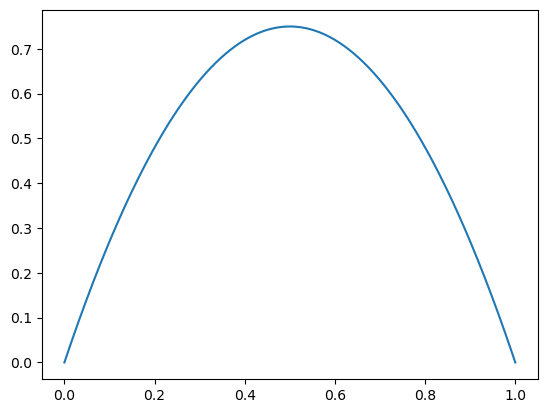

In [3]:
u=3*x*(1-x)
plt.plot(x,u)
plt.show()

Vamos ahora a realizar la integración en elementos finitos con una malla uniforme para obtener una solución aproximada $u_h$

In [4]:
uh=np.zeros(d+2)

In [5]:
h=np.zeros(d+1)
for i in range(d+1):
    h[i]=x[i+1]-x[i]

In [6]:
M=np.zeros((d+2,d+2))           
F=np.zeros(d+2)
M[0,0]=1
M[d+1,d+1]=1
M[1,1]=1/h[0]
F[1]=quad(lambda t: (6*(x[1]-t))/h[0],x[0],x[1])[0]

In [7]:
for i in range(1,d):
    M[i,i] = M[i,i] + 1/h[i]
    M[i,i+1] = M[i,i+1] - 1/h[i]
    M[i+1,i] = M[i+1,i] - 1/h[i]
    M[i+1,i+1] = M[i+1,i+1] + 1/h[i]
    F[i] = F[i] - (quad(lambda t:(6*(t-x[i+1])),x[i],x[i+1])[0])/h[i]
    F[i+1] = F[i+1] + (quad(lambda t:(6*(t-x[i])),x[i],x[i+1])[0])/h[i]

In [8]:
M[d,d]=M[d,d]+1/h[d]
F[d]=F[d] + (quad(lambda t:(6*(t-x[d-1])),x[d-1],x[d])[0])/h[d]

In [9]:
uh=np.linalg.solve(M,F)

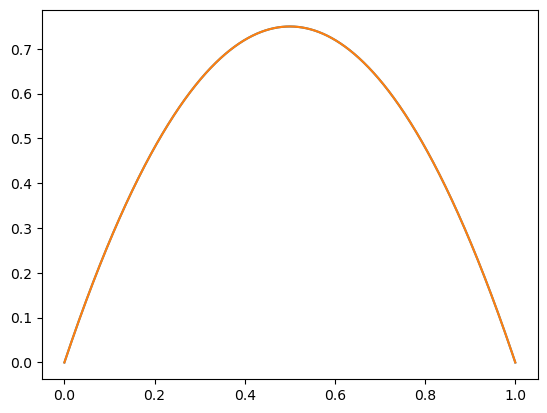

In [10]:
plt.plot(x,u)
plt.plot(x,uh)
plt.show()

In [11]:
Error_cuadratico_uh = np.linalg.norm(uh-u)
print(Error_cuadratico_uh)

5.089534308725723e-10


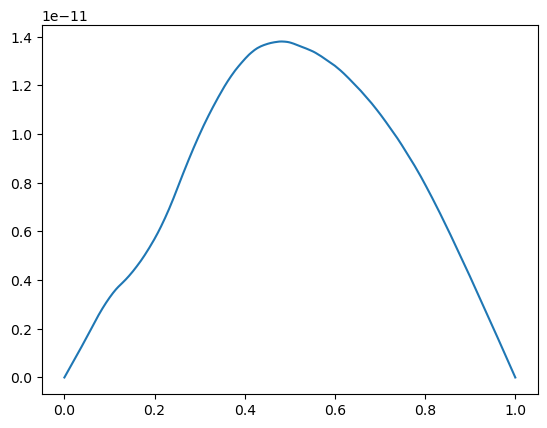

In [12]:
plt.plot(x,uh-u)
plt.show()

Vamos ahora a realizar la integración en elementos finitos aleatoris para obtener una solución aproximada $u_{(h)}$

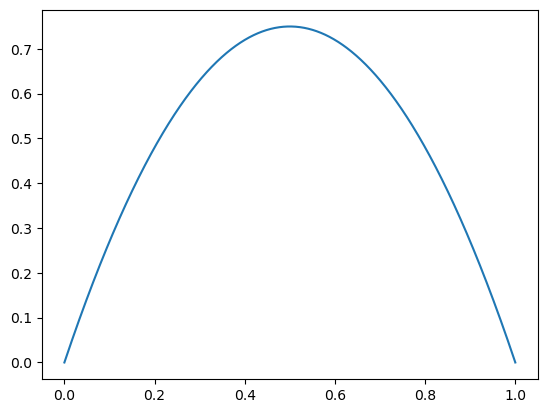

In [13]:
x=np.sort(np.random.uniform(0,1,d+2))
x[0]=0
x[d+1]=1
u=3*x*(1-x)
plt.plot(x,u)
plt.show()

In [14]:
ur=np.zeros(d+2)

In [15]:
h=np.zeros(d+1)
for i in range(d+1):
    h[i]=x[i+1]-x[i]

In [16]:
M=np.zeros((d+2,d+2))           
F=np.zeros(d+2)
M[0,0]=1
M[d+1,d+1]=1
M[1,1]=1/h[0]
F[1]=quad(lambda t: (6*(x[1]-t))/h[0],x[0],x[1])[0]

In [17]:
for i in range(1,d):
    M[i,i] = M[i,i] + 1/h[i]
    M[i,i+1] = M[i,i+1] - 1/h[i]
    M[i+1,i] = M[i+1,i] - 1/h[i]
    M[i+1,i+1] = M[i+1,i+1] + 1/h[i]
    F[i] = F[i] - (quad(lambda t:(6*(t-x[i+1])),x[i],x[i+1])[0])/h[i]
    F[i+1] = F[i+1] + (quad(lambda t:(6*(t-x[i])),x[i],x[i+1])[0])/h[i]

In [18]:
M[d,d]=M[d,d]+1/h[d]
F[d]=F[d] + (quad(lambda t:(6*(t-x[d-1])),x[d-1],x[d])[0])/h[d]

In [19]:
ur=np.linalg.solve(M,F)

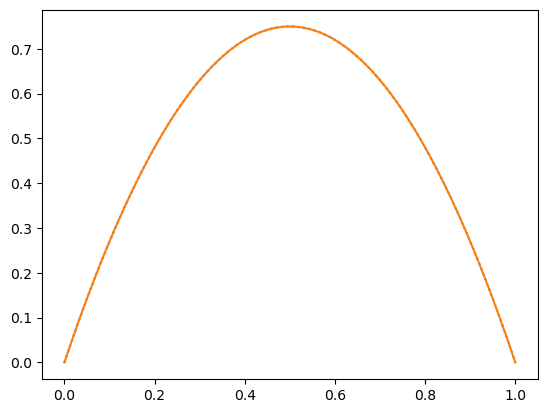

In [20]:
plt.plot(x,u,linestyle='dotted')
plt.plot(x,ur)
plt.show()

In [21]:
Error_cuadratico_ur = np.linalg.norm(ur-u)
print(Error_cuadratico_ur)

2.1934081468223866e-06


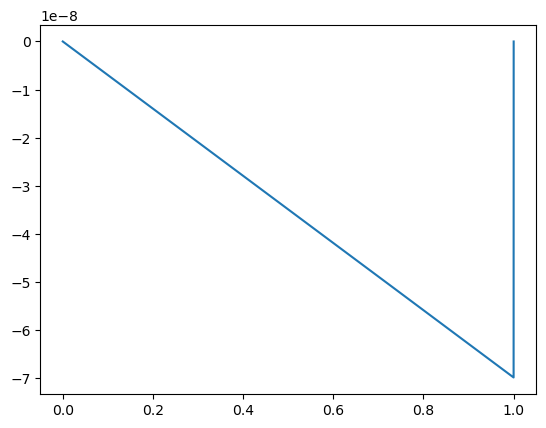

In [22]:
plt.plot(x,ur-u)
plt.show()